# **Business Case: Netflix - Data Exploration and Visualisation**

**Table of Contents**



*   List item

*   List item

*   List item

*   List item

*   List item

*   List item

*   List item

*   List item

*   List item

*   List item

*   List item
*   List item


*   List item


*   List item


*   List item


*   List item


*   List item


*   List item


*   List item


*   List item


*   List item


*   List item



# **🎯 Objective**

Analyzing the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

# **📚 About Data**

This tabular dataset consists of data as of mid-2021, about 8807 movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. The data is available in a single csv file



  

# 1. **Importing Libraries , Loading the data and Basic Observations**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import copy
from wordcloud import WordCloud

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 62.2MB/s]


In [3]:
df = pd.read_csv('netflix.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 🔍 Insights

From the above analysis, it is clear that, data has total of 12 features with lots of mixed alpha numeric data. Also we can see missing data in 5 of the total columns.

# 📝 Statistical Summary

In [7]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## 🔍 Insights



1.   **Type of content** - Among the 8807 items available on Netflix, 6131 of them are movies, accounting for nearly 70% of the total content. The remaining 30% consists of TV series.
2.  **Director** - Rajiv Chilaka holds the top position on the director list, with 19 credits to his name. He specializes in creating animated movies for children.

1.   **Cast** - David Attenborough leads the actor list with 19 appearances in various films and shows on Netflix.

1.   **Country** - The USA ranks at the top as the country with the highest production contribution to Netflix, accounting for 35% of the total content.
2.  **Date Added** - January 1, 2020, stands out as the peak date for content uploads on Netflix. On that day alone, approximately 109 different shows and movies were added to the platform.


2.  **Ratings** - There are 17 different types of ratings present on Netflix. The "TV-MA" (Mature Audience Only) rating dominates the charts, covering almost 36% of the total shows and movies on the platform with this rating.





# 👥 Duplicate Detection

In [11]:
df.duplicated().value_counts()

False    8807
dtype: int64

## 🔍 Insights

There are no duplicate entries in the dataset

# ✅ Sanity Check for columns

In [12]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [13]:
# checking the unique values for columns
for i in ['type','release_year','rating','duration']:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in type column are :-
['Movie' 'TV Show']
----------------------------------------------------------------------
Unique Values in release_year column are :-
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
----------------------------------------------------------------------
Unique Values in rating column are :-
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
----------------------------------------------------------------------
Unique Values in duration column are :-
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 m

In [14]:
# checking the value_counts for columns
for i in ['type','release_year','rating','duration']:
    print('Value count in',i,'column are :-')
    print(df[i].value_counts())
    print('-'*70)

Value count in type column are :-
Movie      6131
TV Show    2676
Name: type, dtype: int64
----------------------------------------------------------------------
Value count in release_year column are :-
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64
----------------------------------------------------------------------
Value count in rating column are :-
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64
----------------------------------------------------------------------
Value count in duration column are :-
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 m

## 🔍 Insights

There is presense of 3 unusual values in rating column. We will replace them by NaN as below

In [15]:
df['rating'].replace({'74 min':np.nan ,'84 min' : np.nan, '66 min' : np.nan},inplace = True)

# 👨🏽‍💻 Missing Value Analysis


In [16]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,NaN,Movies,The comic puts his trademark hilarious/thought...


In [18]:
ind = df[df['duration'].isna()].index
df.loc[ind] = df.loc[ind].fillna(method = 'ffill' , axis = 1)
df.loc[ind ,'rating'] = 'Not Available'
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,2017,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,2010,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,2015,Movies,The comic puts his trademark hilarious/thought...


In [19]:
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [20]:
indices = df[df.rating.isna()].index
indices

Int64Index([5989, 6827, 7312, 7537], dtype='int64')

In [21]:
df.loc[indices , 'rating'] = 'Not Available'
df.loc[indices]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [22]:
df.loc[df['rating'] == 'UR' , 'rating'] = 'NR'
df.rating.value_counts()

TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 83
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
Name: rating, dtype: int64

In [26]:
df.drop(df.loc[df['date_added'].isna()].index , axis = 0 , inplace = True)
df['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [36]:
# total null values in each column
df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [35]:
# percentage of nullity
for i in df.columns:
    null_rate = df[i].isnull().sum()/df.shape[0] * 100
    if null_rate > 0:
        print(f"{i}'s null rate : {round(null_rate,2)}%")

director's null rate : 29.83%
cast's null rate : 9.38%
country's null rate : 9.44%


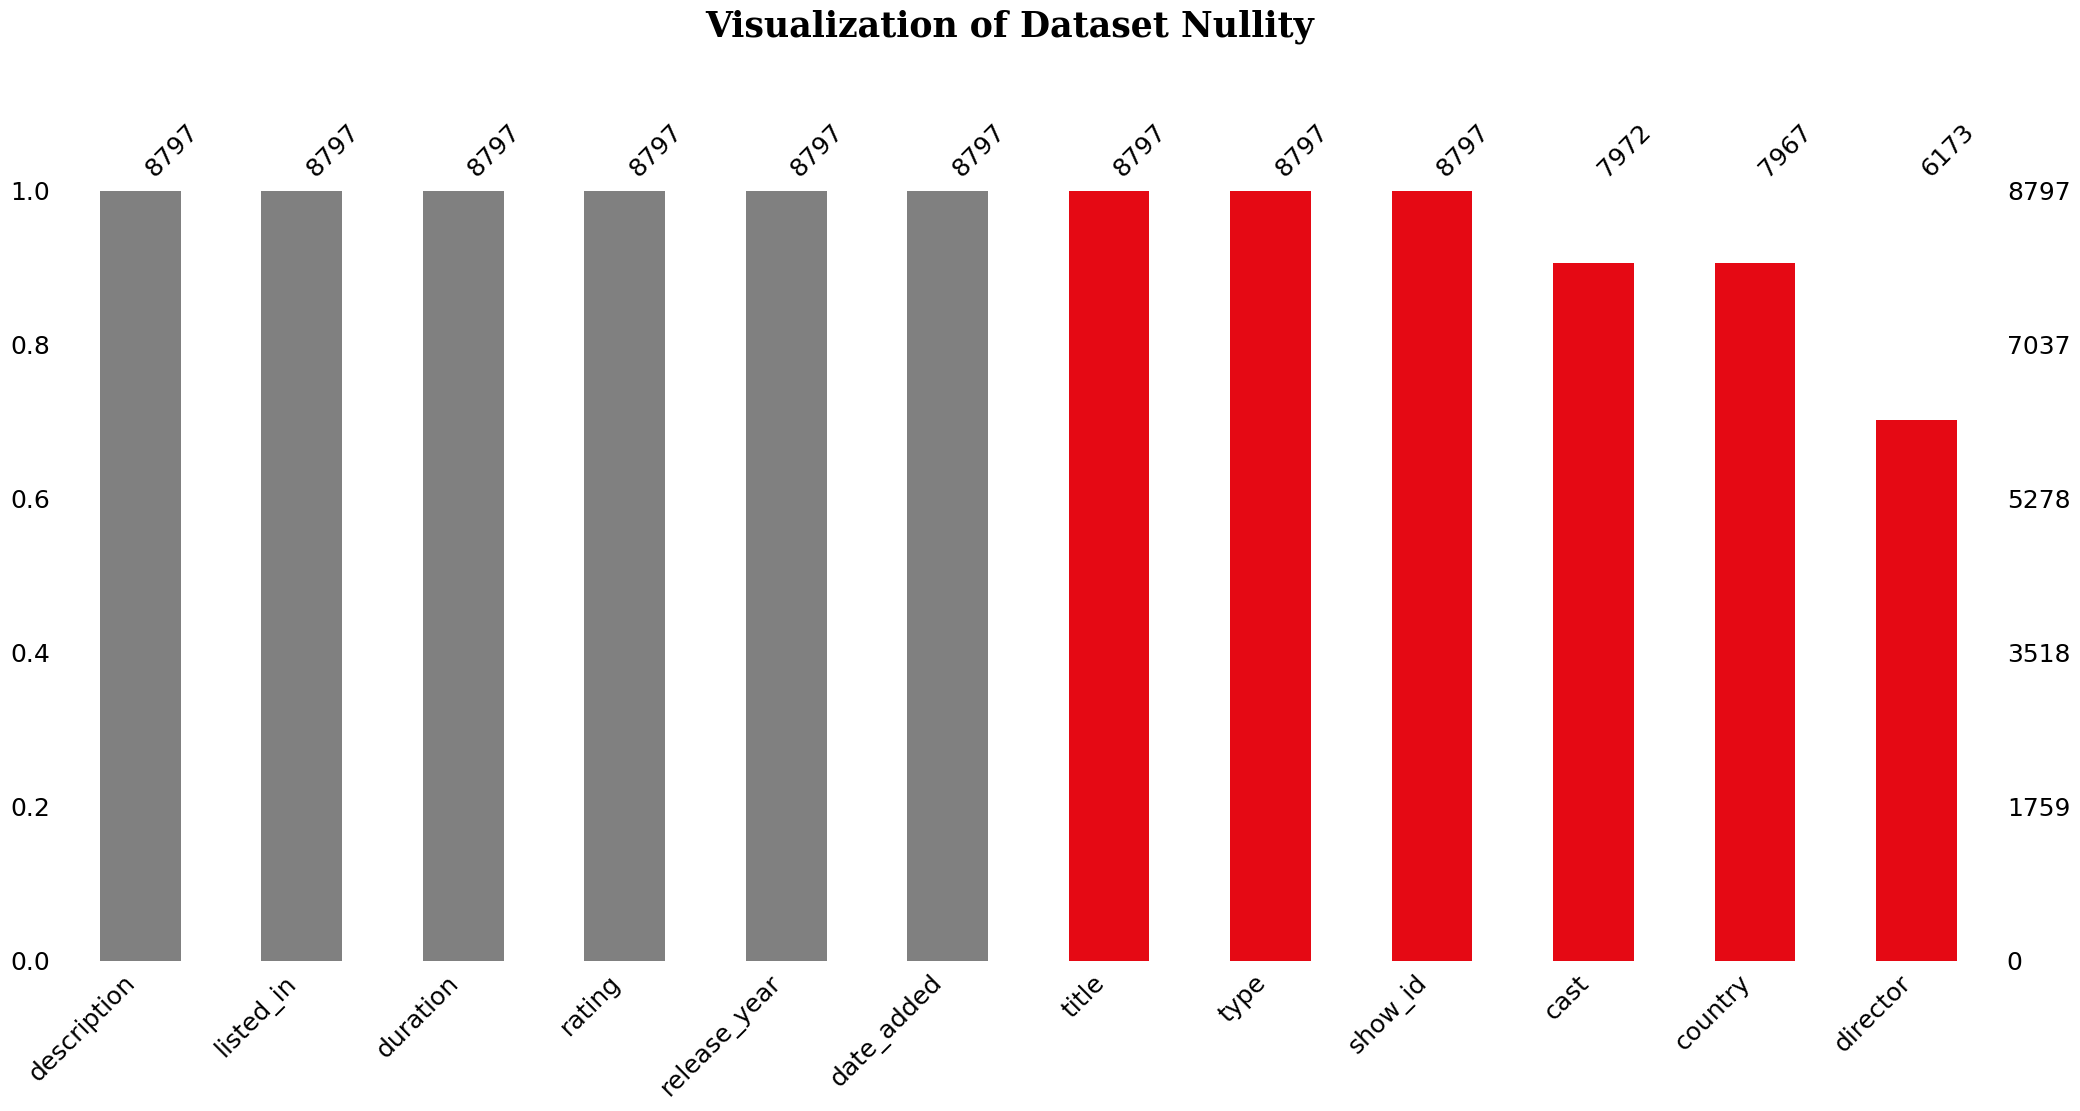

In [32]:
# missing value visualisation
color = ['grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914','#E50914','#E50914']
ax = msno.bar(df,sort = 'descending',color = color,fontsize = 18)
ax.text(3.5,1.2,'Visualization of Dataset Nullity',{'font':'serif', 'color':'black','weight':'bold','size':25})
plt.show()

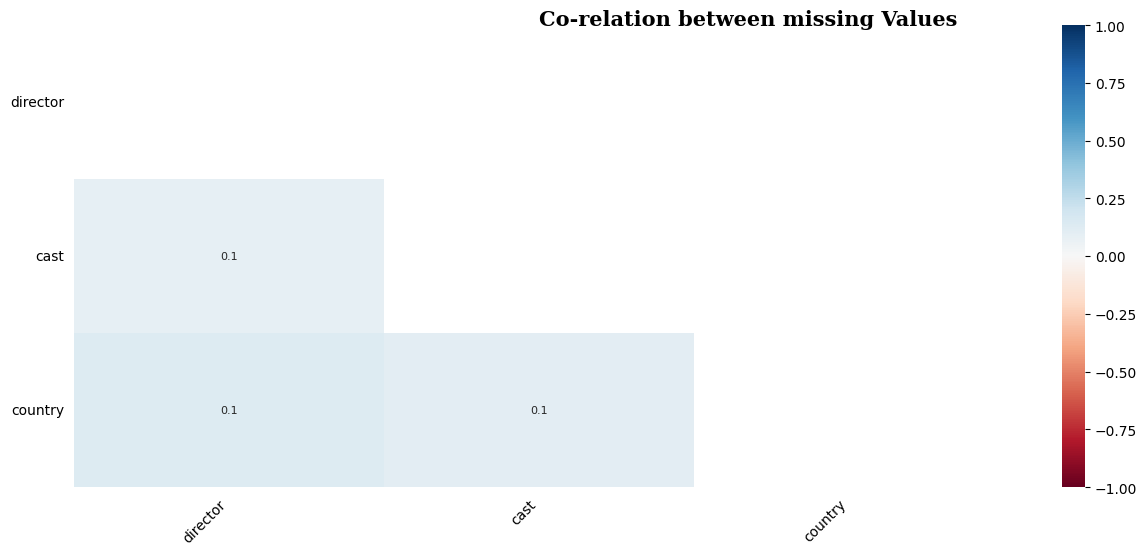

In [34]:
# Correlation between missing Values
ax = msno.heatmap(df,figsize = (15,6),fontsize = 10)
ax.text(1.5,0,'Co-relation between missing Values',{'font':'serif', 'color':'black','weight':'bold','size':15})
plt.show()

## 🔍 Insights


1.  From our above analysis, there are total of 6 columns containing missing values. Director's column has the most missing values followed by cast and country column. Date added, ratings and duration have significantly less missing values (<1%)

2. The heatmap illustrates the correlation of missing data between each pair of columns. Apart from strong correlation between rating and duration column, The fact that all other values are close to 0 indicates that there is no dependence between the occurrence of missing values in two variables



# 🔁 Replacing the missing values

In [37]:
df['director'].fillna('Unknown Director',inplace = True)
df['cast'].fillna('Unknown cast',inplace = True)
df['country'].fillna('Unknown country',inplace = True)

In [38]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# ➕ Adding new columns for better analysis

Add 3 columns - year_added,month_added,week_added to the df to facilitate further data analysis.

In [39]:
# converting date_added to datetime column
df['date_added'] = pd.to_datetime(df['date_added'])

#adding new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,38


# ➗ Un-nesting the columns for better analysis

We will create a new df which has un-nested director,cast and country columns into multiple rows which will help while doing analysis related to them.

In [40]:
# creating a separate table
df1 = copy.deepcopy(df)


df1["director"] = df["director"].str.split(", ")
df1["cast"] = df["cast"].str.split(", ")
df1["country"] = df["country"].str.split(", ")

df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])
df1.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38


In [41]:
#checking shape of new df
df1.shape

(89313, 15)

# 3. Data Exploration and Non Graphical Analysis

In [42]:
# 2 types of content present in dataset - either Movie or TV Show
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [43]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']
movies.duration.value_counts()

90 min     152
97 min     146
94 min     146
93 min     146
91 min     144
          ... 
5 min        1
16 min       1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 208, dtype: int64

In [44]:
tv_shows.duration.value_counts()

1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

Since movie and TV shows both have different format for duration, we can change duration for movies as minutes & TV shows as seasons

In [45]:
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype('float')

In [46]:
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')

In [47]:
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

In [48]:
tv_shows.duration_in_seasons

1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration_in_seasons, Length: 2666, dtype: float64

In [49]:
movies.duration_in_minutes

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_in_minutes, Length: 6131, dtype: float64

# 3.Visual Analysis - Univariate & Bivariate
# 🎬 Content Distribution



In [50]:
x = df['type'].value_counts()
x

Movie      6131
TV Show    2666
Name: type, dtype: int64

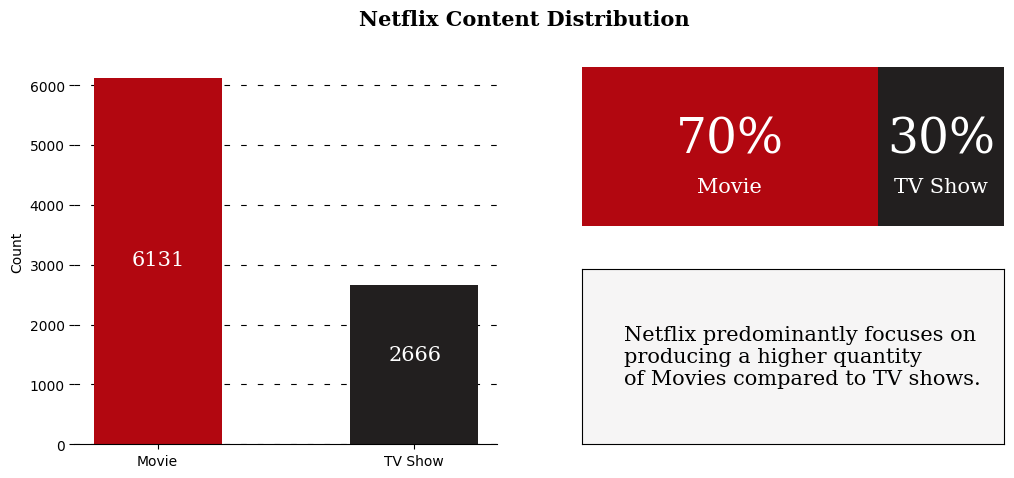

In [51]:
#setting the plot style
fig = plt.figure(figsize = (12,5))
gs = fig.add_gridspec(2,2)

# creating graph for count of movies
ax0 = fig.add_subplot(gs[:,0])
ax0.bar(x.index,x.values,color =['#b20710','#221f1f'],zorder = 2,width = 0.5)
ax0.set(ylabel = 'Count')

# adding value_count label
ax0.text(-0.1,3000,x.values[0],fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax0.text(0.9,1400,x.values[1],fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax0.grid(color='black', linestyle='--', axis='y', zorder=0,  dashes=(5,10))


#removing the axis lines
for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)

# creating the visual for percentage distribution
ax1 = fig.add_subplot(gs[0,1])
ax1.barh(x.index[0],0.7,color = '#b20710')
ax1.barh(x.index[0],0.3,left = 0.7,color = '#221f1f')
ax1.set(xlim = (0,1))

#removing the axis info
ax1.set_xticks([])
ax1.set_yticks([])

# adding graph info
ax1.text(0.35,0.04,'70%',va = 'center', ha='center',fontsize=35, fontweight='light', fontfamily='serif',color='white')
ax1.text(0.35,-0.2,'Movie',va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax1.text(0.85,0.04,'30%',va = 'center', ha='center',fontsize=35, fontweight='light', fontfamily='serif',color='white')
ax1.text(0.85,-0.2,'TV Show',va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

#removing the axis lines
for s in ['top', 'left', 'right', 'bottom']:
    ax1.spines[s].set_visible(False)

# adding text insight
ax2 = fig.add_subplot(gs[1,1])
ax2.set_facecolor('#f6f5f5')
ax2.set_xticks([])
ax2.set_yticks([])

ax2.text(0.1,0.5,'Netflix predominantly focuses on\nproducing a higher quantity\nof Movies compared to TV shows.',
         va = 'center', ha='left',fontsize=15, fontweight='light', fontfamily='serif',color='black')

#adding title to the visual
fig.suptitle('Netflix Content Distribution',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})

plt.show()

## 🔍 Insights

It is observed that , around 70% content is Movies and around 30% content is TV shows.

# ⏳ Evolution of Netflix's Growing Library of Movies & TV Shows

## Analysis of number of Movies and TV shows added over time on Netflix

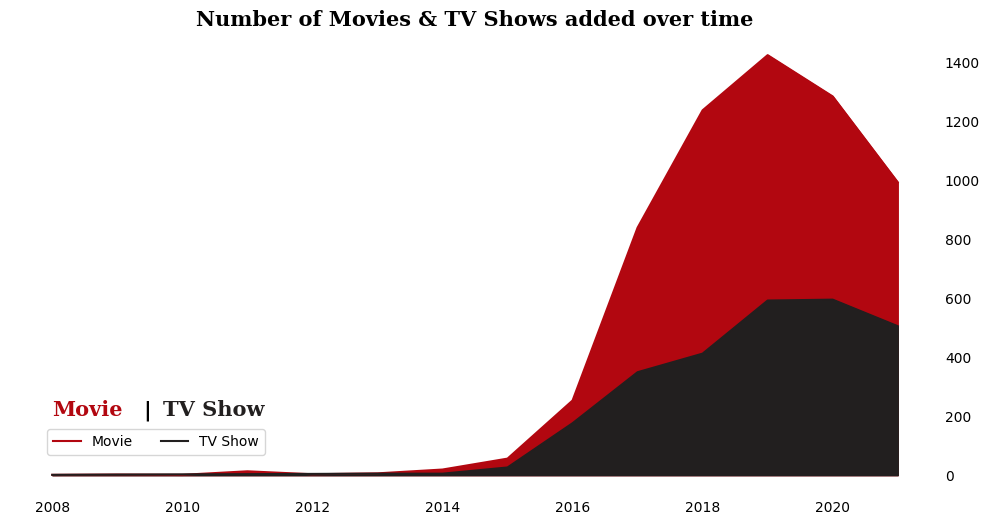

In [54]:
#setting the plot style
fig,ax = plt.subplots(figsize = (12,6))
color = ['#b20710','#221f1f']

#plotting the visual
for i,type_ in  enumerate(df['type'].unique()):
    temp_df = df.loc[df['type'] == type_,'year_added'].value_counts().sort_index()
    ax.plot(temp_df.index,temp_df.values,color = color[i],label = type_)
    ax.fill_between(temp_df.index,0,temp_df.values,color = color[i])

#changing the y-axis position from left to right
ax.yaxis.tick_right()

#removing the axis lines
for s in ['top','left','bottom','right']:
    ax.spines[s].set_visible(False)

#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)

#adding title to the visual
ax.set_title('Number of Movies & TV Shows added over time',
            {'font':'serif', 'size':15,'weight':'bold'})


#adding custom legend
ax.text(2008,200,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
ax.text(2009.4,200,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
ax.text(2009.7,200,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
plt.legend(loc = (0.04,0.09),ncol = 2)


plt.show()

# 🔍 Insights



*   We see a slow start for Netflix over several years. **Things begin to pick up in 2015 and then there is a rapid increase from 2016.**


*   As we saw in the timeline at the start of this analysis, **Netflix went global in 2016 - and it is extremely noticeable in this plot.**


*   The rate of content additions decelerated in 2020, **possibly attributed to the impact of the COVID-19 pandemic.**






# 🎥Directors with the Most Appearances

**Top 10 directors** who have appeared in most movies or TV shows.

In [55]:
d_cnt = df1.groupby('director')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()
d_cnt

,director,title
0,Unknown Director,2624
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12


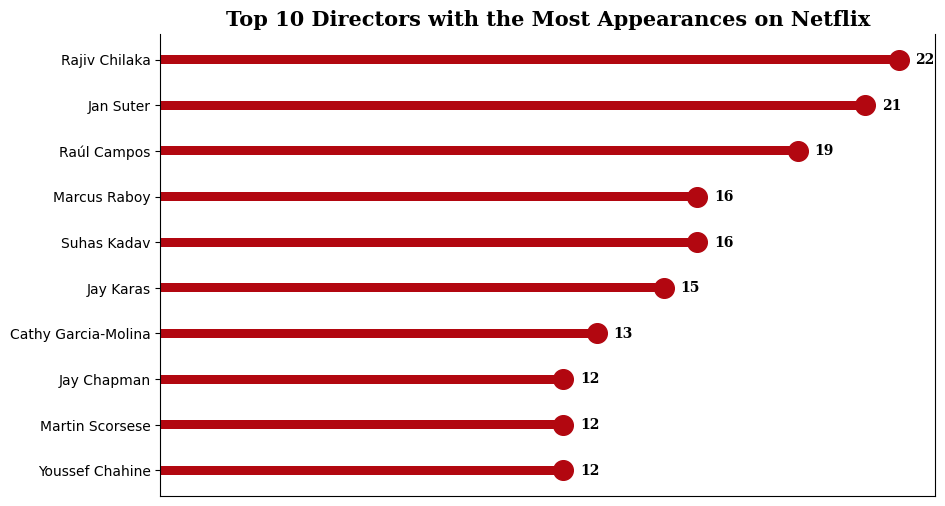

In [56]:
# droping unknown director and reversing the df
d_cnt = d_cnt.iloc[-1:-11:-1]

#setting the plot style
fig,ax = plt.subplots(figsize = (10,6))

#creating the plot
ax.barh(y = d_cnt['director'],width = d_cnt['title'],height = 0.2,color = '#b20710')
ax.scatter(y = d_cnt['director'], x = d_cnt['title'] , s = 200 , color = '#b20710' )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(d_cnt['director'],d_cnt['title']):
    ax.text( x + 0.5 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

    #creating the title
    ax.set_title('Top 10 Directors with the Most Appearances on Netflix',
                {'font':'serif', 'size':15,'weight':'bold'})

    plt.show()

# 🔍 Insights



*  The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter, Raúl Campos




# 👨🏽‍🎤Actor's with the Most Appearances

 Top 10 Actor's who have appeared in most movies or TV shows.

In [57]:
a_cnt = df1.groupby('cast')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()
a_cnt

,cast,title
0,Unknown cast,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29


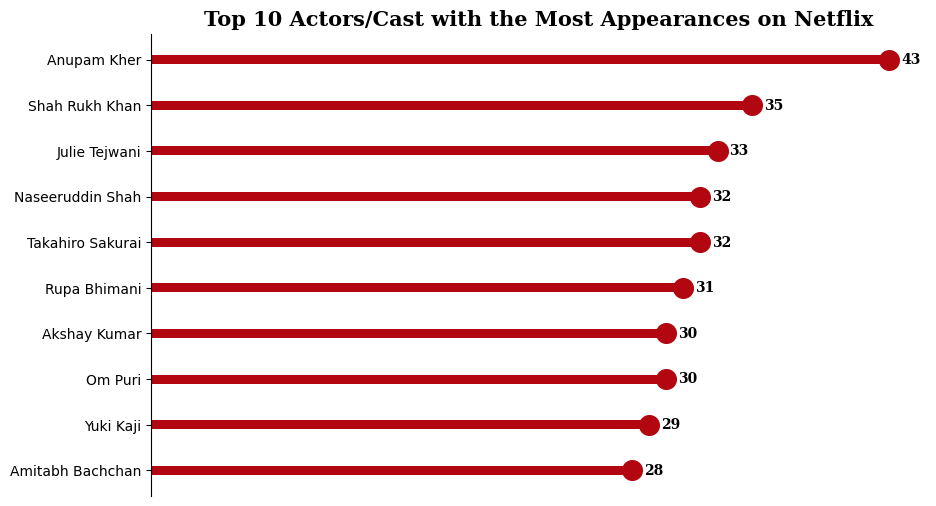

In [58]:
# droping unknown actor and reversing the list
a_cnt = a_cnt.iloc[-1:-11:-1]

#setting the plot style
fig,ax = plt.subplots(figsize = (10,6))

#creating the plot
ax.barh(y = a_cnt['cast'],width = a_cnt['title'],height = 0.2,color = '#b20710')
ax.scatter(y = a_cnt['cast'], x = a_cnt['title'] , s = 200 , color = '#b20710' )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(a_cnt['cast'],a_cnt['title']):
    ax.text( x + 0.7 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#creating the title
ax.set_title('Top 10 Actors/Cast with the Most Appearances on Netflix',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

# 🔍 Insights

Significantly, 8 out of the top 10 Actors/Cast with the highest number of appearances on Netflix are of Indian origin.

In [59]:
#creating df for top 10 movies producing countries
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_movie = df_movie.drop(3)

#replacing country names in shortformat
df_movie['country'] = df_movie['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
df_movie

,country,title
0,USA,2751
1,India,962
2,UK,532
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


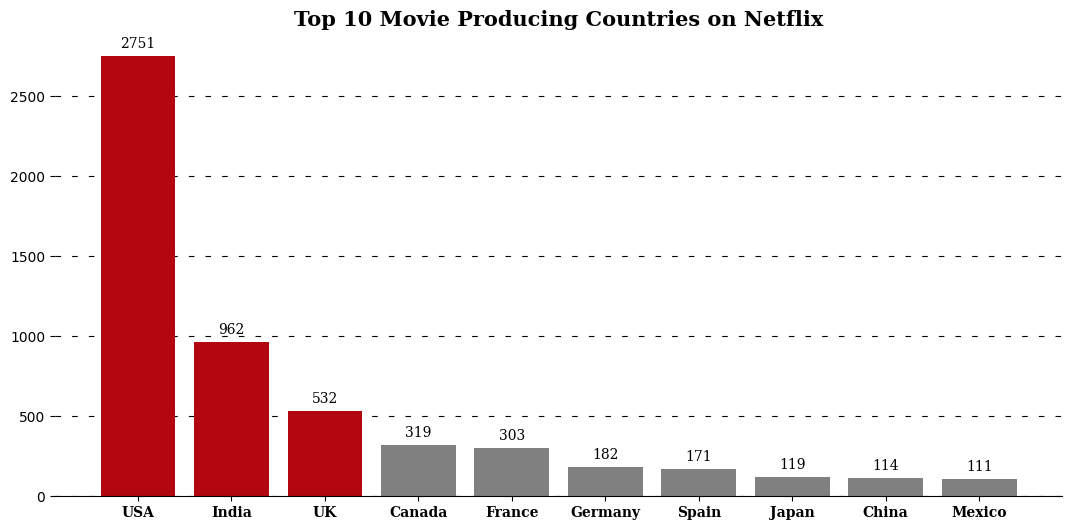

In [60]:
#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map = ['grey' for i in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # highlight color

#creating the plot
ax.bar(df_movie['country'],df_movie['title'],color = color_map,zorder = 2)

#adding valuecounts
for i in df_movie.index:
    ax.text(df_movie.loc[i,'country'],df_movie.loc[i,'title'] + 75, df_movie.loc[i,'title'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')

#setting grid style
ax.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the x-axis labels
ax.set_xticklabels(df_movie['country'],fontweight = 'bold',fontfamily='serif')

#removing the axis lines

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Movie Producing Countries on Netflix',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()


In [63]:
#creating df for top 10 tv shows producing countries
df_tv = df1[df1['type'] == 'TV Show']
df_tv = df_tv.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_tv = df_tv.drop(1)

#replacing country names in shortformat
df_tv['country'] = df_tv['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
df_tv

,country,title
0,USA,932
2,UK,271
3,Japan,198
4,S korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,65
10,Spain,61


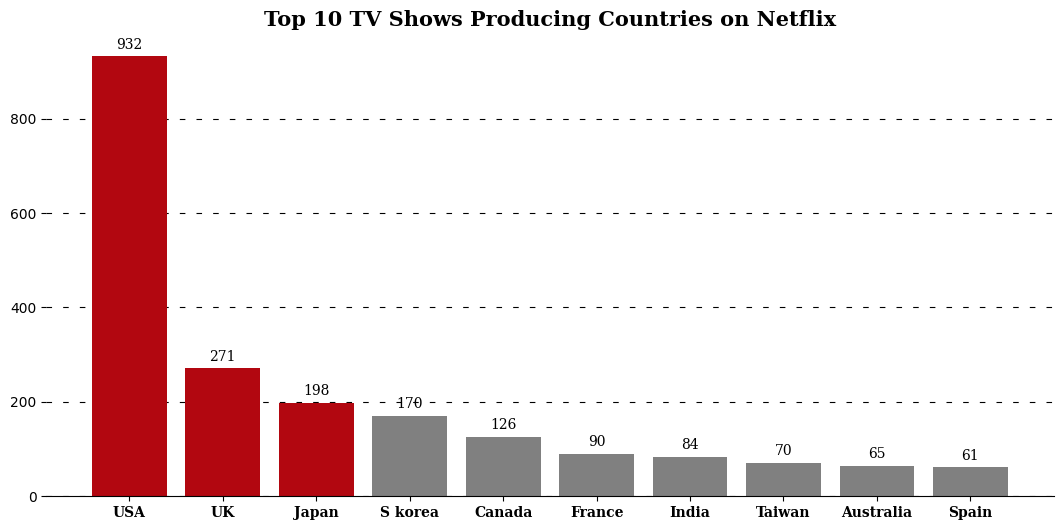

In [64]:
#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map = ['grey' for i in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # highlight color

#creating the plot
ax.bar(df_tv['country'],df_tv['title'],color = color_map,zorder = 2)

#adding valuecounts
for i in df_tv.index:
    ax.text(df_tv.loc[i,'country'],df_tv.loc[i,'title'] + 25, df_tv.loc[i,'title'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')

#setting grid style
ax.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the x-axis labels
ax.set_xticklabels(df_tv['country'],fontweight = 'bold',fontfamily='serif')

#removing the axis lines

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 TV Shows Producing Countries on Netflix',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

# 🔍 Insights



1. Content Investment Strategy


*   Netflix heavily invests in content production in the USA, its home country, to attract and retain subscribers. India, being the second on the list, signifies Netflix's strategic focus on the Indian market due to its significant population and growing demand for streaming services.



2.   Global Expansion



*   The presence of shows from various countries, such as UK, Canada, France, Japan,etc. highlights Netflix's effort to cater to a diverse global audience.This also enables Netflix to provide content that resonates with the cultural and linguistic preferences of different regions.


3.  TV Shows Vs Movies

*  Indian's prefer to watch movies over TV shows, on contrary South koreans perfer Tv shows over movies.









# 🎥 🆚 📺 Content Split

Content split for Top 10 Countries which have produced the most Movies and most TV Shows on Netflix.

In [65]:
#creating a df for top 10 countries based on overall content count
c_cnt = df1.groupby('country')['title'].nunique().sort_values(ascending  = False).reset_index().loc[0:10]

c_cnt = c_cnt.drop(2) #dropping unknown country column

#renaming the countries
c_cnt['country'] = c_cnt['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
c_cnt

,country,title
0,USA,3683
1,India,1046
3,UK,803
4,Canada,445
5,France,393
6,Japan,317
7,Spain,232
8,S korea,231
9,Germany,226
10,Mexico,169


In [66]:
#creating a df to calculate split between tv-show and movies
df_merge = pd.merge(c_cnt,df_movie, on = 'country', how = 'left')
df_merge = pd.merge(df_merge,df_tv, on = 'country',how = 'left')

#renaming the columns
df_merge.rename(columns = {'title_x':'Total_Count','title_y':'Movie_Count','title':'TV_Show_Count'},inplace = True)

#filling the uncaptured information
df_merge['Movie_Count'].fillna(df_merge['Total_Count']-df_merge['TV_Show_Count'],inplace = True)
df_merge['TV_Show_Count'].fillna(df_merge['Total_Count']-df_merge['Movie_Count'],inplace = True)

#calculating the %split between movies and tv-shows
df_merge['Movie%'] = round((df_merge['Movie_Count']/df_merge['Total_Count'])*100)
df_merge['TV%'] = round((df_merge['TV_Show_Count']/df_merge['Total_Count'])*100)

#changing the data-type of columns to int
for i in df_merge.columns[1:]:
    df_merge[i] = df_merge[i].astype('int')

#sorting the df
df_merge = df_merge.sort_values(by= 'Movie%')
df_merge

,country,Total_Count,Movie_Count,TV_Show_Count,Movie%,TV%
7,S korea,231,61,170,26,74
5,Japan,317,119,198,38,62
2,UK,803,532,271,66,34
9,Mexico,169,111,58,66,34
3,Canada,445,319,126,72,28
6,Spain,232,171,61,74,26
0,USA,3683,2751,932,75,25
4,France,393,303,90,77,23
8,Germany,226,182,44,81,19
1,India,1046,962,84,92,8


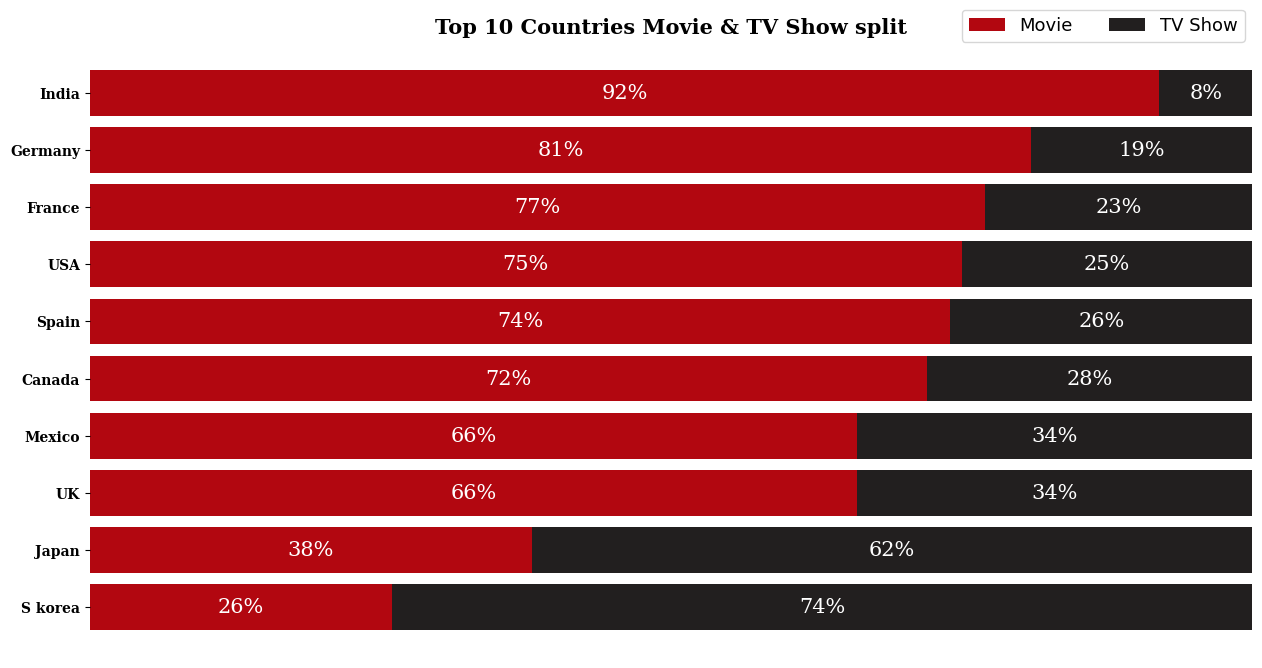

In [67]:
#setting the plot style
fig,ax = plt.subplots(figsize = (15,8))

#plotting the visual
ax.barh(df_merge['country'],width = df_merge['Movie%'],color = '#b20710')
ax.barh(df_merge['country'],width = df_merge['TV%'],left = df_merge['Movie%'],color ='#221f1f')
ax.set(xlim=(0,100))

#customizing ticks
ax.set_xticks([])
ax.set_yticklabels(df_merge['country'],fontweight = 'bold',fontfamily='serif')

#adding % values in the bars

for i in df_merge.index:
    ax.text((df_merge.loc[i,'Movie%'])/2,df_merge.loc[i,'country'],f"{df_merge.loc[i,'Movie%']}%",
            va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

    ax.text((df_merge.loc[i,'Movie%'] + (df_merge.loc[i,'TV%']/2)),df_merge.loc[i,'country'],f"{df_merge.loc[i,'TV%']}%",
            va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

#removing the axis lines

for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Countries Movie & TV Show split',
            {'font':'serif', 'size':15,'weight':'bold'})

#adding legend
ax.legend(['Movie','TV Show'],loc = (0.75,1),ncol = 2,fontsize = 13)

plt.show()

## 🔍 Insights
**Content Preferences**



*   TV shows are more popular than movies in Asian countries, especially South Korea and Japan, where they account for more than 60% of the content.
*   Movies are more popular than TV shows in European countries,where they account for more than 65% of the content.


*   India has the highest percentage of movies (92%) among all the countries, which may indicate a high demand for movies.
*  North American countries have similar movie percentages (around 70%) and similar TV show percentages (around 30%) as each other,suggesting a similar preference or taste among these markets.







# 📅 Best Month to launch a TV show/Movie?



In [68]:
month = df.groupby('month_added')['type'].value_counts()
month.name = 'count' # to avoid error while doing reset_index
month = month.reset_index()

#converting month_added to categorical type to help in future sorting steps
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month['month_added'] = pd.Categorical(month['month_added'], categories=months, ordered=True)

month.head()

,month_added,type,count
0,April,Movie,550
1,April,TV Show,214
2,August,Movie,519
3,August,TV Show,236
4,December,Movie,547


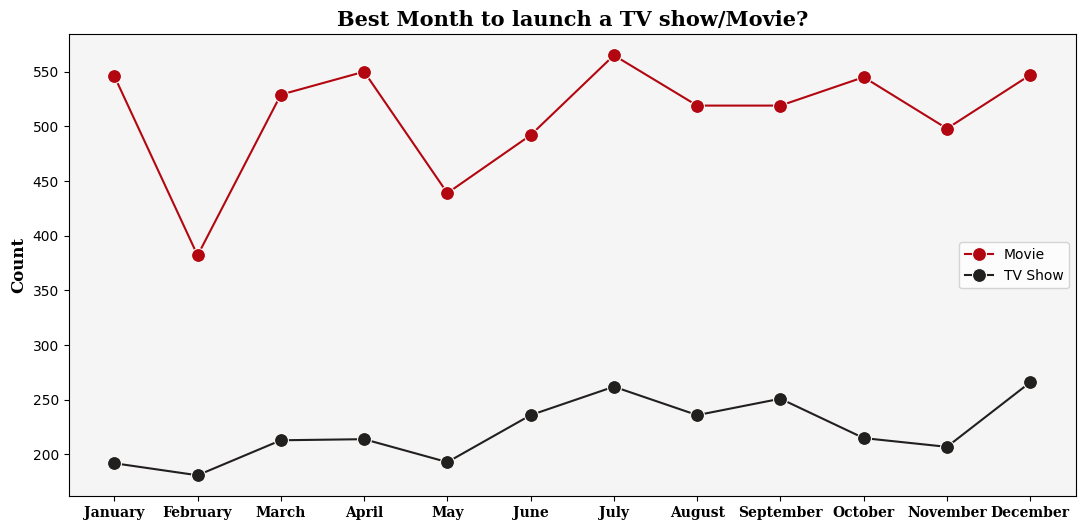

In [69]:
# creating two different tables for movies and tv shows
month_movie = month.loc[month['type'] == 'Movie'].sort_values(by = 'month_added')
month_tv = month.loc[month['type'] == 'TV Show'].sort_values(by = 'month_added')

#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))
ax.set_facecolor('#f6f5f5')

#creating the plot
sns.lineplot(data = month_movie, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#b20710',
             label = 'Movie',ax = ax)
sns.lineplot(data = month_tv, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#221f1f',
             label = 'TV Show', ax = ax)

#customizing the axis ticks
ax.set_xticklabels(month_movie['month_added'],fontweight = 'bold',fontfamily='serif')

#customizing axis label
plt.xlabel(None)
plt.ylabel('Count',fontweight = 'bold',fontfamily='serif',fontsize = 12)

#customizing legend
plt.legend(loc = 'center right')

#creating the title
ax.set_title('Best Month to launch a TV show/Movie?',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

# 🔍 Insights

1. Consistent Patterns
     The monthly upload count of both Movies and TV shows exhibits a remarkably similar trend.

2. Seasonal Fluctuations


*   There is a notable correlation between content uploads and holiday seasons, with January and December witnessing significant spikes in content additions.
*   The months of July, August, October, and December record higher content upload counts, whereas February, May, and November experience comparatively lower counts.


*  They may choose to focus on certain months or seasons to release high content and schedule fewer releases based on information about historical viewer preferences and behavior.






# 📅 Total content distribution by release year of the content

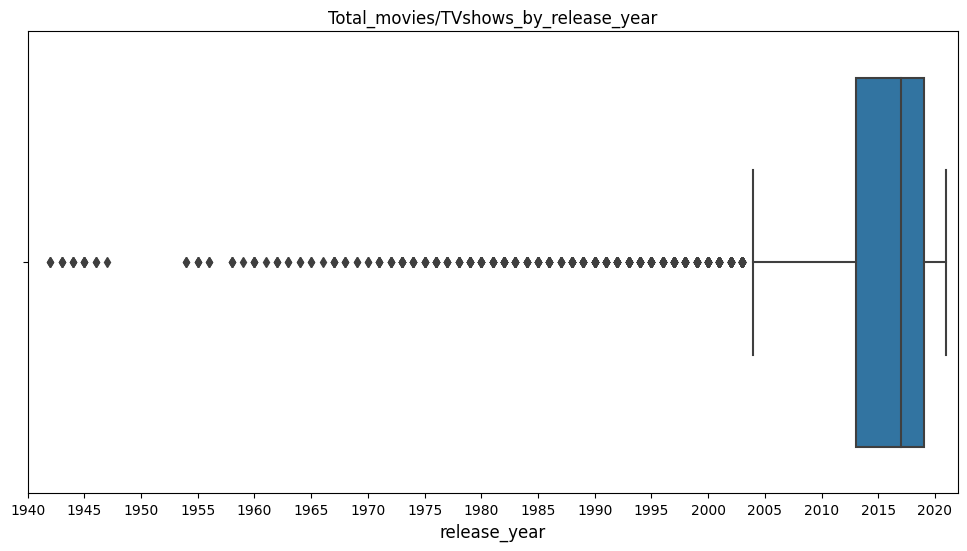

In [77]:
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

# 🔍 Insights

*  Netflix have major content which is released in the year range 2000-2021
*  It seems that the content older than year 2000 is almost missing from the Netflix.

# **🎭 Genre Galore**

Analysis of different genre's for Movies and TV Shows present on Netflix.

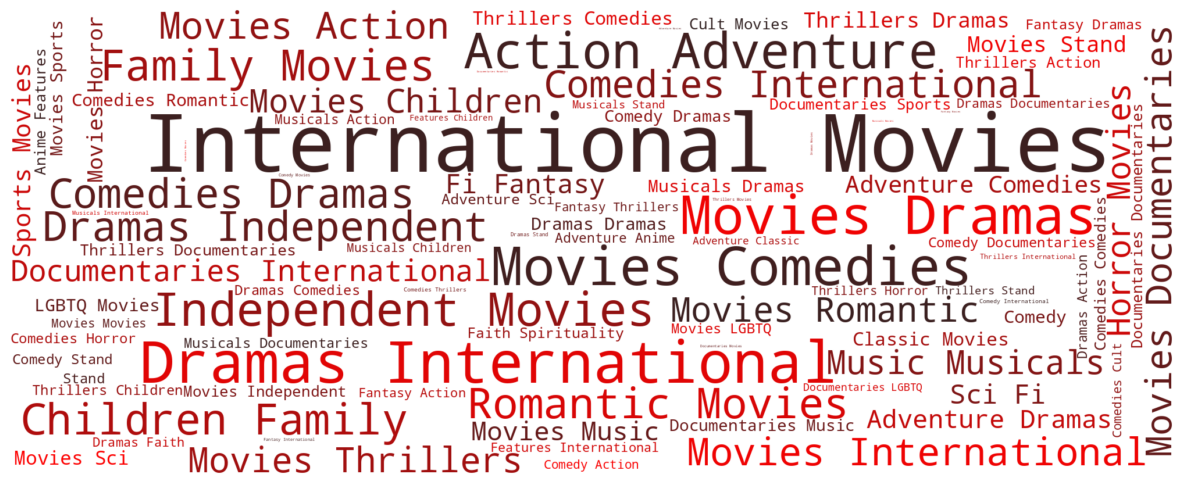

In [71]:
movie_genre = df[df['type'] == 'Movie']

text = str(list(movie_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')

color = sns.color_palette("dark:red", as_cmap=True)

wordcld = WordCloud(max_words = 150, width = 2000,  height = 800,background_color = 'white',colormap = color).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcld,interpolation = 'bilinear')
plt.axis('off')
plt.show()

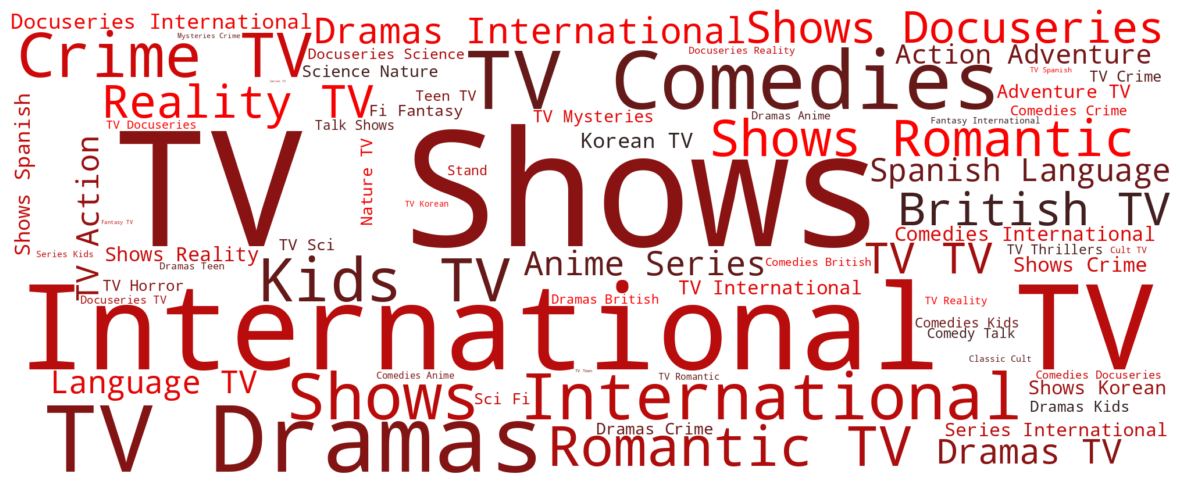

In [72]:
tv_genre = df[df['type'] == 'TV Show']

text = str(list(tv_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')

color = sns.color_palette("dark:red", as_cmap=True)

wordcld = WordCloud(max_words = 150, width = 2000,  height = 800,background_color = 'white',colormap = color).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcld,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# 🔍 Insights



*   Popular Movie genres on Netflix include **International Movies, Comedies, Dramas, Action, and Romantic films.**
*   Among TV Shows on Netflix, popular genres encompass **Drama, Crime, Romance, Kids' content, Comedies, and International series.**



# 🔍Insights based on Non-Graphical and Visual Analysis



*   Around 70% content on Netflix is Movies and around 30% content is TV shows.

*   The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.

*   Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.

*   Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.

*   Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix

*   Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.

*   The release year for shows is concentrated in the range 2005-2021.

*   50 mins - 150 mins is the range of movie durations, excluding potential outliers.
*   1-3 seasons is the range for TV shows seasons, excluding potential outliers.


*   various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).


*   Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US


*   International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.


*   Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.


*   Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.


*   Shorter duration movies have been popular in last 10 years.



#🔍 Business Insights





*   Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.

*   Maximum content (more than 80%) is

    > TV-MA - Content intended for mature audiences aged 17 and above


    > TV-14 - Content suitable for viewers aged 14 and above.

    > TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)

    > R - Restricted Content, that may not be suitable for viewers under age 17.

These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.

*   These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.
*   Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.

*  Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3)
This can be considered while production of new content on Netflix -- drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.



# Recommendations



*  Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region.
eg. Indian Mythological content is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.
*   Country specific insights - The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country.

*   Netflix is currently serving mostly Mature audiences or Children with parental guidance. It have scope to cater other audiences as well such as familymen , Senior citizen , kids of various age etc.


